In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.oauth2 import service_account
from google.cloud import bigquery

from datetime import datetime,timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_validate

from sklearn.metrics import classification_report


import ipdb

key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"

credentials = service_account.Credentials.from_service_account_file(key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"])


# Downloading all 3 tables related to users in BQ




In [2]:
def extract_users():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.user_properties`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)





In [3]:
def extract_user_id():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.user_id`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)



In [4]:
def extract_user_metrics():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.users_metrics`
        
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)



In [5]:
users_properties = extract_users()

users_properties



,Newsletter,Type,Country,Language,ProfileType2,ReceiveNewsletter,LoggedIn,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,...,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,event_id,client_event_time,user_creation_time,user_id,id,Products_Sensory_kit
0,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38695,NaN
1,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38696,NaN
2,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,9,2022-03-04 18:10:45.671000+00:00,2021-05-12 14:48:12.149000+00:00,0,70424,NaN
3,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-04 18:09:42.747000+00:00,2021-05-12 14:48:12.149000+00:00,0,70686,NaN
4,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-04 18:09:42.748000+00:00,2021-05-12 14:48:12.149000+00:00,0,70687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,122,2022-05-13 00:03:46.899000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313882,0.0
1320225,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,123,2022-05-13 00:03:58.233000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313883,0.0
1320226,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,102,2022-05-13 00:00:35.906000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313884,0.0
1320227,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,127,2022-05-13 00:05:47.672000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313885,0.0


In [6]:
user_id = extract_user_id()

user_id



,User_id,Attribution,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M,purchases
0,71631,ELU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
1,73665,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
2,73414,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
3,16477,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
4,17709,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,69765,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13675,69860,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13676,70095,ELU,0,0,0.0,0,0,1,0,0,0.0,0,0,True
13677,50495,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True


In [7]:
user_id.nunique()




User_id                          12858
Attribution                         14
Purchases_PY1Y                       2
Purchases_PLY                        2
Purchases_MEGR                       2
Purchases_PLM                        2
Purchases_ME1                        2
Purchases_EY3M                       2
Purchases_tier_upgrade_0_to_1        2
Purchases_PM3M                       2
Purchases_MPGR                       2
Purchases_EY1Y                       2
Purchases_PY3M                       2
purchases                            2
dtype: int64

In [8]:
user_metrics = extract_user_metrics()

user_metrics




,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear,purchases
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,0.0,0.0,0.0,0.0,0.0,221.0,0.0,0.0,0.0,False
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,0.0,0.0,0.0,0.0,0.0,23.0,9.0,0.0,0.0,False
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,False
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,27.0,7.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,0.0,0.0,0.0,0.0,0.0,35.0,45.0,0.0,0.0,False
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0.0,0.0,0.0,0.0,0.0,91.0,21.0,0.0,0.0,False
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0.0,0.0,0.0,0.0,0.0,42.0,19.0,0.0,0.0,False
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,False


# Preparing users_properties for merge (1.3m lines, to group by user_id)







In [9]:
users_properties.columns




Index(['Newsletter', 'Type', 'Country', 'Language', 'ProfileType2',
       'ReceiveNewsletter', 'LoggedIn', 'Products_Sesame_Street_Numbers',
       'Products_Smart_Shapes', 'Products_Smart_Numbers',
       'Products_Smart_Letters', 'Products_Deluxe_Learning_Kit',
       'Products_Nordic_Kit', 'Products_Smart_Letters_Lowercase',
       'Products_Smart_Kit', 'Pieces_Uppercase_Letters',
       'Pieces_Lowercase_Letters', 'Pieces_Sesame_Street_Numbers',
       'Pieces_Numbers', 'Pieces_English', 'Pieces_Nordic_Letters',
       'Pieces_Shapes', 'Games_Marbotic_Numbers', 'Games_Alphamonster',
       'Games_10_Fingers', 'Games_Lil_Reader', 'Games_Bla_Bla_Box',
       'Games_Sesame_Street_Numbers', 'Games_Up_To_100', 'Games_Smart_Shapes',
       'Games_Marbotic_Letters', 'Games_More_Or_Less', 'Games_Marbotic',
       'Games_Vocabubble', 'event_id', 'client_event_time',
       'user_creation_time', 'user_id', 'id', 'Products_Sensory_kit'],
      dtype='object')

ProfileType2 Count_user_id: null 1290926, Teacher 1871, Customer 2101, Parent 2446, Visitor 548

Type	Count_user_id: Teacher 283263, Parent 1014629 



In [10]:
users_properties = users_properties.drop(columns = ["Country","Language","Newsletter","ReceiveNewsletter","LoggedIn","ProfileType2","event_id","user_creation_time","id"])



In [11]:
users_properties.shape


(1320229, 31)

In [12]:
list_to_group = list(users_properties.columns)
list_to_group.remove("client_event_time")
list_to_group



['Type',
 'Products_Sesame_Street_Numbers',
 'Products_Smart_Shapes',
 'Products_Smart_Numbers',
 'Products_Smart_Letters',
 'Products_Deluxe_Learning_Kit',
 'Products_Nordic_Kit',
 'Products_Smart_Letters_Lowercase',
 'Products_Smart_Kit',
 'Pieces_Uppercase_Letters',
 'Pieces_Lowercase_Letters',
 'Pieces_Sesame_Street_Numbers',
 'Pieces_Numbers',
 'Pieces_English',
 'Pieces_Nordic_Letters',
 'Pieces_Shapes',
 'Games_Marbotic_Numbers',
 'Games_Alphamonster',
 'Games_10_Fingers',
 'Games_Lil_Reader',
 'Games_Bla_Bla_Box',
 'Games_Sesame_Street_Numbers',
 'Games_Up_To_100',
 'Games_Smart_Shapes',
 'Games_Marbotic_Letters',
 'Games_More_Or_Less',
 'Games_Marbotic',
 'Games_Vocabubble',
 'user_id',
 'Products_Sensory_kit']

In [13]:
user_products_and_game = pd.DataFrame(users_properties.groupby("user_id").max()["client_event_time"])
user_products_and_game


/tmp/ipykernel_1289/2148192039.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  user_products_and_game = pd.DataFrame(users_properties.groupby("user_id").max()["client_event_time"])


,client_event_time
user_id,
0,2022-05-13 09:51:34.834000+00:00
211,2022-03-13 13:32:14.916000+00:00
274,2022-05-01 17:44:50.615000+00:00
453,2022-03-19 21:37:36.833000+00:00
564,2022-04-23 15:37:54.445000+00:00
...,...
73184,2022-05-12 16:33:26.489000+00:00
73185,2022-05-12 17:04:58.087000+00:00
73188,2022-05-12 23:13:13.334000+00:00


In [14]:
user_products_and_game = user_products_and_game.reset_index()
user_products_and_game



,user_id,client_event_time
0,0,2022-05-13 09:51:34.834000+00:00
1,211,2022-03-13 13:32:14.916000+00:00
2,274,2022-05-01 17:44:50.615000+00:00
3,453,2022-03-19 21:37:36.833000+00:00
4,564,2022-04-23 15:37:54.445000+00:00
...,...,...
2622,73184,2022-05-12 16:33:26.489000+00:00
2623,73185,2022-05-12 17:04:58.087000+00:00
2624,73188,2022-05-12 23:13:13.334000+00:00
2625,73197,2022-05-13 09:25:19.784000+00:00


In [15]:
# Group by user_id and select only the information for the last client_event_time
grouping =users_properties.loc[users_properties.groupby("user_id")["client_event_time"].idxmax()]
grouping = grouping[list_to_group]
user_products_pieces_games = grouping.merge(user_products_and_game,on="user_id",how='inner')
user_products_pieces_games



,Type,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,Products_Smart_Letters,Products_Deluxe_Learning_Kit,Products_Nordic_Kit,Products_Smart_Letters_Lowercase,Products_Smart_Kit,Pieces_Uppercase_Letters,...,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,user_id,Products_Sensory_kit,client_event_time
0,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2022-05-13 09:51:34.834000+00:00
1,Parent,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,211,NaN,2022-03-13 13:32:14.916000+00:00
2,Parent,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,274,0.0,2022-05-01 17:44:50.615000+00:00
3,Parent,1,1,0,0,1,1,0,0,0,...,1,1,1,1,0,1,0,453,NaN,2022-03-19 21:37:36.833000+00:00
4,Teacher,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,564,0.0,2022-04-23 15:37:54.445000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,Teacher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,73184,0.0,2022-05-12 16:33:26.489000+00:00
2623,Parent,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,73185,0.0,2022-05-12 17:04:58.087000+00:00
2624,Parent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,73188,1.0,2022-05-12 23:13:13.334000+00:00
2625,Teacher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,73197,0.0,2022-05-13 09:25:19.784000+00:00


In [16]:
user_products_pieces_games = user_products_pieces_games.drop(columns = "client_event_time")



In [17]:
user_products_pieces_games



,Type,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,Products_Smart_Letters,Products_Deluxe_Learning_Kit,Products_Nordic_Kit,Products_Smart_Letters_Lowercase,Products_Smart_Kit,Pieces_Uppercase_Letters,...,Games_Bla_Bla_Box,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,user_id,Products_Sensory_kit
0,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,Parent,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,211,NaN
2,Parent,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,274,0.0
3,Parent,1,1,0,0,1,1,0,0,0,...,0,1,1,1,1,0,1,0,453,NaN
4,Teacher,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,Teacher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,73184,0.0
2623,Parent,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,73185,0.0
2624,Parent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,73188,1.0
2625,Teacher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,73197,0.0


# Preparing user_id table for merge, grouping on user_id


In [33]:
user_id.tail(30)



,User_id,Attribution,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M,purchases
13649,67323,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13650,67222,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13651,71907,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13652,72005,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13653,72098,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13654,71977,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13655,65853,EPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13656,56088,PLU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13657,69406,PLU,0,0,0.0,0,0,0,0,0,0.0,0,1,True
13658,69262,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True


In [48]:
user_id_short = pd.DataFrame(user_id.groupby("User_id").max()["purchases"])

user_id_short


,purchases
User_id,
36,False
37,False
50,False
52,False
71,False
...,...
73806,False
73807,False
73808,False


In [49]:
user_id_short = user_id_short.reset_index()

user_id_short



,User_id,purchases
0,36,False
1,37,False
2,50,False
3,52,False
4,71,False
...,...,...
12853,73806,False
12854,73807,False
12855,73808,False
12856,73809,False


In [50]:
list_purchases = [col for col in list(user_id.columns) if col[:10] == "Purchases_"]

list_purchases


for col in list_purchases:
    col_series = user_id.groupby("User_id").sum()[col]
    user_id_short = pd.merge(user_id_short.copy(), col_series, on="User_id", how="left")
    

user_id_short


,User_id,purchases,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,36,False,0,0,0.0,0,0,0,0,0,0.0,0,0
1,37,False,0,0,0.0,0,0,0,0,0,0.0,0,0
2,50,False,0,0,0.0,0,0,0,0,0,0.0,0,0
3,52,False,0,0,0.0,0,0,0,0,0,0.0,0,0
4,71,False,0,0,0.0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,73806,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12854,73807,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12855,73808,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12856,73809,False,0,0,0.0,0,0,0,0,0,0.0,0,0


In [51]:
user_id_short.rename(columns = {'User_id':'user_id'}, inplace = True)




In [52]:
user_id_short



,user_id,purchases,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,36,False,0,0,0.0,0,0,0,0,0,0.0,0,0
1,37,False,0,0,0.0,0,0,0,0,0,0.0,0,0
2,50,False,0,0,0.0,0,0,0,0,0,0.0,0,0
3,52,False,0,0,0.0,0,0,0,0,0,0.0,0,0
4,71,False,0,0,0.0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,73806,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12854,73807,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12855,73808,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12856,73809,False,0,0,0.0,0,0,0,0,0,0.0,0,0


# Merging the 3 tables on user_id


In [158]:
user_final = user_metrics.merge(user_products_pieces_games, on="user_id", how='left')
user_final


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Games_Lil_Reader,Games_Bla_Bla_Box,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,Products_Sensory_kit
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,1,1,0,1,0,1,1,1,1,0.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0,1,0,0,0,1,0,1,1,NaN
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0,0,0,0,0,0,0,1,0,0.0


In [123]:
print(list(user_final.columns))

['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo',

In [159]:
user_final = user_final.merge(user_id_short, on="user_id", how='left')


In [160]:
user_final


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Uploading table user_augmented on Big query


In [126]:
user_final.head()

,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
print(list(user_final.columns))



['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo',

In [63]:
#Localisation du projet name et table_id sur gcp
project="marbotic"
table_id = "marbotic_dataset.user_augmented"
client = bigquery.Client(project,credentials)

job = client.load_table_from_dataframe(grouping, table_id) 

job.result()  # Wait for the job to complete.
table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), table_id))



Loaded 2627 rows and 30 columns to marbotic_dataset.user_augmented


# Downloading session_augmented to engineer features & add to user_augmented


In [64]:
def extract_session_augmented():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.session_augmented`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)


In [106]:
session_augmented = extract_session_augmented()

In [134]:
session_augmented.unique_activity

0        2
1        6
2        3
3        3
4        4
        ..
18811    0
18812    1
18813    1
18814    1
18815    1
Name: unique_activity, Length: 18816, dtype: int64

In [135]:
session_augmented.columns




Index(['session_id', 'city', 'language', 'os_version', 'region', 'country',
       'device_model', 'start_version', 'session_end', 'id', 'user_id',
       'event_type_Account_Sign_In', 'event_type_Account_Sign_Out',
       'event_type_Account_Sign_Up', 'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activation_New_Activation',
       'event_type_Activation_Piece', 'event_type_Activation_Product',
       'event_type_Activity_Good_Answer', 'event_type_Activity_Start',
       'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer',
       'event_type_Error_Error', 'event_type_Game_Pause',
       'event_type_Game_Start', 'event_type_Game_Stop',
       'event_type_OB_ClickStore', 'event_type_OB_ClickTrial',
       'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial',
  

2.7517595496186757


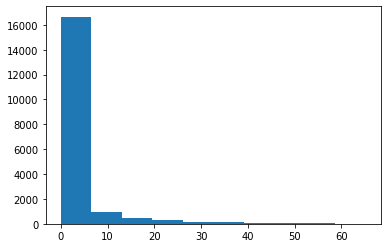

In [130]:
#quelle est l'intervalle de temps moyen entre deux sessions en jours
plt.hist(session_augmented.time_since_last_session_min/60/24)

print(session_augmented.time_since_last_session_min.mean()/60/24)



(0.0, 200.0)

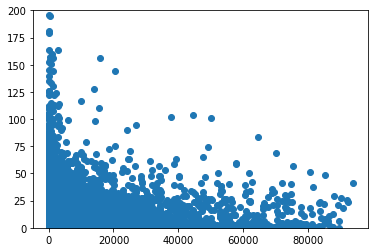

In [132]:
#lien entre la durée de la session, et la durée depuis la derniere session
plt.scatter(x = session_augmented.time_since_last_session_min, y = session_augmented.duration_min)

plt.ylim(0,200)




(0.0, 200.0)

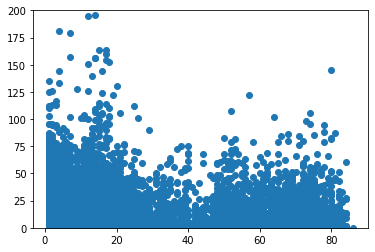

In [259]:
#lien entre la durée de la session, et la maturité
plt.scatter(x = session_augmented.week_maturity, y = session_augmented.duration_min)
plt.ylim(0,200)



In [136]:
#add timestamp of last session played by user
metrics_to_add = pd.DataFrame(session_augmented.groupby("user_id").max()["session_start"])
metrics_to_add


/tmp/ipykernel_1289/2830324933.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  metrics_to_add = pd.DataFrame(session_augmented.groupby("user_id").max()["session_start"])


,session_start
user_id,
211.0,2022-03-13 13:13:59.516000+00:00
274.0,2022-05-01 17:44:47.617000+00:00
453.0,2022-03-19 21:37:08.487000+00:00
564.0,2022-04-23 15:32:15.984000+00:00
609.0,2022-05-07 16:25:06.142000+00:00
...,...
73184.0,2022-05-12 16:17:01.874000+00:00
73185.0,2022-05-12 16:32:08.014000+00:00
73188.0,2022-05-12 22:22:40.444000+00:00


In [138]:
metrics_to_add = metrics_to_add.reset_index()
metrics_to_add

,user_id,session_start
0,211.0,2022-03-13 13:13:59.516000+00:00
1,274.0,2022-05-01 17:44:47.617000+00:00
2,453.0,2022-03-19 21:37:08.487000+00:00
3,564.0,2022-04-23 15:32:15.984000+00:00
4,609.0,2022-05-07 16:25:06.142000+00:00
...,...,...
2609,73184.0,2022-05-12 16:17:01.874000+00:00
2610,73185.0,2022-05-12 16:32:08.014000+00:00
2611,73188.0,2022-05-12 22:22:40.444000+00:00
2612,73197.0,2022-05-13 09:24:31.452000+00:00


In [140]:
#add last session metrics : duration, Time_spent, nb of game & setup events, time_since_last_session_min, % of good answers / total answers in last game, nb Scenes played, nb of scaffolding, churn risk  (group_by user_id and take last session )

grouping =session_augmented.loc[session_augmented.groupby("user_id")["session_start"].idxmax()]
grouping = grouping[["user_id", "game_events","setup_events", "unique_activity", "Time_Spent", "Action_Element_Name",
       "Profile_Age_days", "good_answer_ratio", "duration_min", "time_since_last_session_min", "event_type_Scene_Enter", "event_type_Scaffolding_Scaffolding","churn_risk"]]
metrics_to_add = grouping.merge(metrics_to_add.copy(),on="user_id",how='inner')

metrics_to_add



,user_id,game_events,setup_events,unique_activity,Time_Spent,Action_Element_Name,Profile_Age_days,good_answer_ratio,duration_min,time_since_last_session_min,event_type_Scene_Enter,event_type_Scaffolding_Scaffolding,churn_risk,session_start
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,40.0,0.0,1,2022-03-13 13:13:59.516000+00:00
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,2.0,0.0,0,2022-05-01 17:44:47.617000+00:00
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,3.0,0.0,1,2022-03-19 21:37:08.487000+00:00
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,30.0,0.0,0,2022-04-23 15:32:15.984000+00:00
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,0.0,0.0,0,2022-05-07 16:25:06.142000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,9.0,0.0,0,2022-05-12 16:17:01.874000+00:00
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,7.0,0.0,0,2022-05-12 16:32:08.014000+00:00
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,58.0,0.0,0,2022-05-12 22:22:40.444000+00:00
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,1.0,0.0,0,2022-05-13 09:24:31.452000+00:00


In [142]:
# add metrics since signup : average time between 2 sessions, average session duration/ average time_spent,  % of good answers / total answers, average nb of games by session, average nb of scenes event_type_Scene_Enter, average scaffolding

list_to_average = ["time_since_last_session_min","duration_min","Time_Spent","good_answer_ratio","game_events","unique_activity","event_type_Scene_Enter","event_type_Scaffolding_Scaffolding"]

for col in list_to_average:
    col_series = session_augmented.groupby("user_id").mean()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add


,user_id,game_events_x,setup_events,unique_activity_x,Time_Spent_x,Action_Element_Name,Profile_Age_days,good_answer_ratio_x,duration_min_x,time_since_last_session_min_x,...,churn_risk,session_start,time_since_last_session_min_y,duration_min_y,Time_Spent_y,good_answer_ratio_y,game_events_y,unique_activity_y,event_type_Scene_Enter_y,event_type_Scaffolding_Scaffolding_y
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,1,2022-03-13 13:13:59.516000+00:00,2204.765063,24.549023,9047.875000,85.660885,103.000000,8.250000,40.000000,0.0
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,0,2022-05-01 17:44:47.617000+00:00,9513.140860,0.415362,41.285714,NaN,5.714286,0.000000,4.428571,0.0
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,1,2022-03-19 21:37:08.487000+00:00,24892.368950,11.830778,2129.333333,25.000000,51.000000,2.666667,7.666667,0.0
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,0,2022-04-23 15:32:15.984000+00:00,0.000000,5.641017,693.000000,NaN,52.000000,0.000000,30.000000,0.0
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,0,2022-05-07 16:25:06.142000+00:00,0.000000,7.956633,1428.000000,NaN,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,0,2022-05-12 16:17:01.874000+00:00,0.000000,16.410250,2494.000000,50.000000,123.000000,1.000000,9.000000,0.0
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,0,2022-05-12 16:32:08.014000+00:00,0.000000,32.834550,5743.000000,50.000000,122.000000,1.000000,7.000000,0.0
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,0,2022-05-12 22:22:40.444000+00:00,0.000000,50.548167,18505.000000,100.000000,219.000000,1.000000,58.000000,0.0
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,0,2022-05-13 09:24:31.452000+00:00,0.000000,0.805533,481.000000,NaN,10.000000,0.000000,1.000000,0.0


In [143]:
# add count of sessions
list_to_unique_count = ["session_id"]
for col in list_to_unique_count:
    col_series = session_augmented.groupby("user_id").nunique()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add


,user_id,game_events_x,setup_events,unique_activity_x,Time_Spent_x,Action_Element_Name,Profile_Age_days,good_answer_ratio_x,duration_min_x,time_since_last_session_min_x,...,session_start,time_since_last_session_min_y,duration_min_y,Time_Spent_y,good_answer_ratio_y,game_events_y,unique_activity_y,event_type_Scene_Enter_y,event_type_Scaffolding_Scaffolding_y,session_id
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,2022-03-13 13:13:59.516000+00:00,2204.765063,24.549023,9047.875000,85.660885,103.000000,8.250000,40.000000,0.0,8
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,2022-05-01 17:44:47.617000+00:00,9513.140860,0.415362,41.285714,NaN,5.714286,0.000000,4.428571,0.0,7
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,2022-03-19 21:37:08.487000+00:00,24892.368950,11.830778,2129.333333,25.000000,51.000000,2.666667,7.666667,0.0,3
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,2022-04-23 15:32:15.984000+00:00,0.000000,5.641017,693.000000,NaN,52.000000,0.000000,30.000000,0.0,1
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,2022-05-07 16:25:06.142000+00:00,0.000000,7.956633,1428.000000,NaN,0.000000,1.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,2022-05-12 16:17:01.874000+00:00,0.000000,16.410250,2494.000000,50.000000,123.000000,1.000000,9.000000,0.0,1
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,2022-05-12 16:32:08.014000+00:00,0.000000,32.834550,5743.000000,50.000000,122.000000,1.000000,7.000000,0.0,1
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,2022-05-12 22:22:40.444000+00:00,0.000000,50.548167,18505.000000,100.000000,219.000000,1.000000,58.000000,0.0,1
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,2022-05-13 09:24:31.452000+00:00,0.000000,0.805533,481.000000,NaN,10.000000,0.000000,1.000000,0.0,1


In [144]:
# add sum of (non-deduplicated) game events, games, scenes, total session duration/  time_spent
list_to_sum = ["game_events", "unique_activity", "event_type_Scene_Enter","duration_min", "Time_Spent"]

for col in list_to_sum:
    col_series = session_augmented.groupby("user_id").sum()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add


,user_id,game_events_x,setup_events,unique_activity_x,Time_Spent_x,Action_Element_Name,Profile_Age_days,good_answer_ratio_x,duration_min_x,time_since_last_session_min_x,...,game_events_y,unique_activity_y,event_type_Scene_Enter_y,event_type_Scaffolding_Scaffolding_y,session_id,game_events,unique_activity,event_type_Scene_Enter,duration_min,Time_Spent
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,103.000000,8.250000,40.000000,0.0,8,824.0,66,320.0,196.392183,72383.0
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,5.714286,0.000000,4.428571,0.0,7,40.0,0,31.0,2.907533,289.0
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,51.000000,2.666667,7.666667,0.0,3,153.0,8,23.0,35.492333,6388.0
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,52.000000,0.000000,30.000000,0.0,1,52.0,0,30.0,5.641017,693.0
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,0.000000,1.000000,0.000000,0.0,1,0.0,1,0.0,7.956633,1428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,123.000000,1.000000,9.000000,0.0,1,123.0,1,9.0,16.410250,2494.0
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,122.000000,1.000000,7.000000,0.0,1,122.0,1,7.0,32.834550,5743.0
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,219.000000,1.000000,58.000000,0.0,1,219.0,1,58.0,50.548167,18505.0
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,10.000000,0.000000,1.000000,0.0,1,10.0,0,1.0,0.805533,481.0


In [ ]:
# by Scene_Name, nb of events Scene_Start since signup : not done

In [161]:
#merge to user_final DF

user_final = user_final.copy().merge(metrics_to_add,on="user_id",how='left')
user_final



/tmp/ipykernel_1289/608847400.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'event_type_Scene_Enter_y'} in the result is deprecated and will raise a MergeError in a future version.
  user_final = user_final.copy().merge(metrics_to_add,on="user_id",how='left')


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,game_events_y,unique_activity_y,event_type_Scene_Enter_y,event_type_Scaffolding_Scaffolding_y,session_id_y,game_events,unique_activity,event_type_Scene_Enter_y,duration_min,Time_Spent
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,221.000000,0.000000,221.000000,0.0,1.0,221.0,0.0,221.0,22.834500,274557.0
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,8.827267,2082.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,14.333333,0.000000,7.666667,0.0,3.0,43.0,0.0,23.0,5.723883,1853.0
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,8.333333,0.000000,4.666667,0.0,3.0,25.0,0.0,14.0,3.080383,308.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,11.000000,0.000000,5.400000,0.0,5.0,55.0,0.0,27.0,3.982200,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,68.666667,3.666667,11.666667,0.0,3.0,206.0,11.0,35.0,42.179950,9264.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,140.000000,4.000000,91.000000,0.0,1.0,140.0,4.0,91.0,39.785633,7331.0
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,61.500000,0.500000,21.000000,0.0,2.0,123.0,1.0,42.0,24.527300,5112.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,8.000000,0.000000,7.000000,0.0,1.0,8.0,0.0,7.0,0.994517,695.0


In [248]:
print(list(user_final.columns))





['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id_x', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo

# Preparing user_augmented for ML classification model


In [162]:
user_final.duplicated().sum() # Compute the number of duplicated rows

0

In [163]:
user_final.isnull().sum().sort_values(ascending = False)/len(user_final)*100

Pieces_English                96.610815
good_answer_ratio_x           62.109673
Action_Element_Name           37.814166
good_answer_ratio_y           29.169840
Products_Sensory_kit          17.821782
                                ...    
event_type_OB_HasKitYes        0.000000
event_type_OB_HasKitNo         0.000000
event_type_OB_HasKeyNo         0.000000
event_type_OB_Email            0.000000
event_type_Toast_Disappear     0.000000
Length: 140, dtype: float64

In [164]:
user_final = user_final.drop(columns = ["Pieces_English","Products_Sensory_kit","Action_Element_Name","good_answer_ratio_x"])


In [226]:
len(user_final.columns)


136

In [169]:
user_final.isna().sum().sort_values(ascending = False)/len(user_final)*100


good_answer_ratio_y           29.169840
Profile_Age_days              15.841584
Purchases_EY3M                14.356436
Purchases_PY3M                14.356436
Purchases_EY1Y                14.356436
                                ...    
event_type_OB_HasKitNo         0.000000
event_type_OB_HasKeyNo         0.000000
event_type_OB_Email            0.000000
event_type_OB_DoYouHaveKit     0.000000
event_type_Scene_Leave         0.000000
Length: 136, dtype: float64

In [173]:
user_final.fillna(0,inplace=True) #remplace les NaN par 0

In [174]:
user_final.isnull().sum().sort_values(ascending = False)/len(user_final)*100

user_id                       0.0
Games_Up_To_100               0.0
Games_Marbotic_Numbers        0.0
Games_Alphamonster            0.0
Games_10_Fingers              0.0
                             ... 
event_type_OB_HasKitNo        0.0
event_type_OB_HasKeyNo        0.0
event_type_OB_Email           0.0
event_type_OB_DoYouHaveKit    0.0
Time_Spent                    0.0
Length: 136, dtype: float64

(array([1046.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1580.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

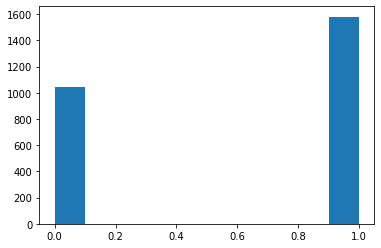

In [175]:
plt.hist(user_final.churn_risk)

In [176]:
X = user_final.drop(columns = "churn_risk")
y = user_final.churn_risk


In [217]:
time_columns = X.select_dtypes(include = [timedelta,"datetime64[ns, UTC]"]).drop(['city',"language","os_version","region","country","device_model","start_version","Type","purchases_y"],axis=1).columns

time_columns

Index(['client_event_time', 'user_creation_time', 'session_start'], dtype='object')

In [245]:
TODAY = datetime(2022, 5, 13, 0, 0)

In [247]:
#add to X : week_maturity (today minus user_creation_time) en semaine
X["week_maturity"] = (TODAY - X['user_creation_time']).map(lambda x: int(np.ceil(x.days/7))+1)

#add to X : time since last session (today minus session_start) en jours? ou semaine?
X["time_since_last_session"] = (TODAY - X['session_start']).map(lambda x: int(np.ceil(x.days/7))+1)

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects

In [240]:
num_transformer = MinMaxScaler()
num_columns = X.select_dtypes(include=['float64','int64']).columns

num_columns

Index(['user_id', 'id', 'session_id_x', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       ...
       'game_events_y', 'unique_activity_y', 'event_type_Scene_Enter_y',
       'event_type_Scaffolding_Scaffolding_y', 'session_id_y', 'game_events',
       'unique_activity', 'event_type_Scene_Enter_y', 'duration_min',
       'Time_Spent'],
      dtype='object', length=122)

In [236]:
bool_columns = X.select_dtypes(include="bool").columns
bool_columns

Index(['purchases_x'], dtype='object')

In [241]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
cat_columns = X.select_dtypes(include=['object','O']).drop(columns = "session_start").columns
cat_columns


Index(['city', 'language', 'os_version', 'region', 'country', 'device_model',
       'start_version', 'Type', 'purchases_y'],
      dtype='object')

In [237]:
len(cat_columns)+len(num_columns)+len(time_columns)+len(bool_columns)


135

In [179]:
#robust scale all num metrics
r_scaler = RobustScaler() # Instanciate Robust Scaler
r_scaler.fit(X) # Fit scaler to feature
X_scaled = r_scaler.transform(X)



TypeError: Cannot cast DatetimeArray to dtype float64